# 1.Importing all necessary modules

In [238]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# 2.Import dataset

In [239]:
df = pd.read_csv('C:\DATASCIENCE\Projects\Invistico_Airline.csv')
df = pd.DataFrame(df)
df.head()


,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


#Loading Info

In [240]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

#Filling missing values

In [241]:
df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].mean(), inplace=True)

#Sum of null values

In [242]:
print(df.isnull().sum())

satisfaction                         0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64


##Renaming columns

In [243]:
for i in df:
    print(i)
    j = i.replace(' ','_')
    df.rename(columns={i:j.capitalize()},inplace=True)

satisfaction
Gender
Customer Type
Age
Type of Travel
Class
Flight Distance
Seat comfort
Departure/Arrival time convenient
Food and drink
Gate location
Inflight wifi service
Inflight entertainment
Online support
Ease of Online booking
On-board service
Leg room service
Baggage handling
Checkin service
Cleanliness
Online boarding
Departure Delay in Minutes
Arrival Delay in Minutes


In [244]:
df.nunique()

Satisfaction                            2
Gender                                  2
Customer_type                           2
Age                                    75
Type_of_travel                          2
Class                                   3
Flight_distance                      5398
Seat_comfort                            6
Departure/arrival_time_convenient       6
Food_and_drink                          6
Gate_location                           6
Inflight_wifi_service                   6
Inflight_entertainment                  6
Online_support                          6
Ease_of_online_booking                  6
On-board_service                        6
Leg_room_service                        6
Baggage_handling                        5
Checkin_service                         6
Cleanliness                             6
Online_boarding                         6
Departure_delay_in_minutes            466
Arrival_delay_in_minutes              473
dtype: int64

##To find duplicated values


In [245]:
df.duplicated().sum()

0

##Removing columns

In [246]:
df = df.drop(['Departure/arrival_time_convenient','Gate_location','Ease_of_online_booking'],axis = 1)
df.head()

,Satisfaction,Gender,Customer_type,Age,Type_of_travel,Class,Flight_distance,Seat_comfort,Food_and_drink,Inflight_wifi_service,Inflight_entertainment,Online_support,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Cleanliness,Online_boarding,Departure_delay_in_minutes,Arrival_delay_in_minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,2,4,2,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,2,2,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,2,0,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,3,4,3,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,4,3,4,2,0,2,4,2,5,0,0.0


##Count total number of rows and columns


In [247]:
df.shape

(129880, 20)

#Plotting customer satisfaction graph

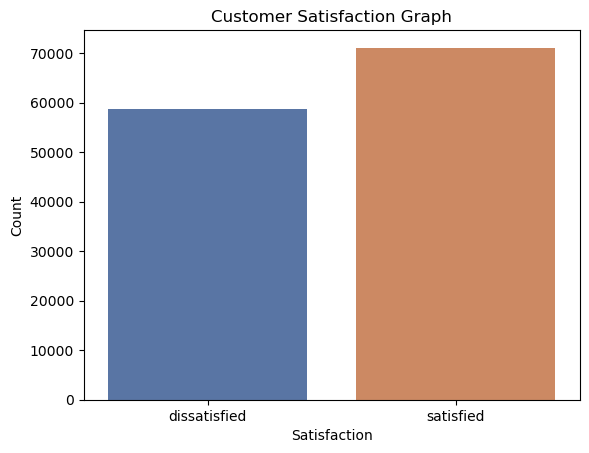

In [248]:
usr = df.groupby('Satisfaction').size().reset_index(name= 'Count')
sns.barplot(x="Satisfaction", y="Count", data=usr, palette="deep").set_title('Customer Satisfaction Graph')
plt.show()

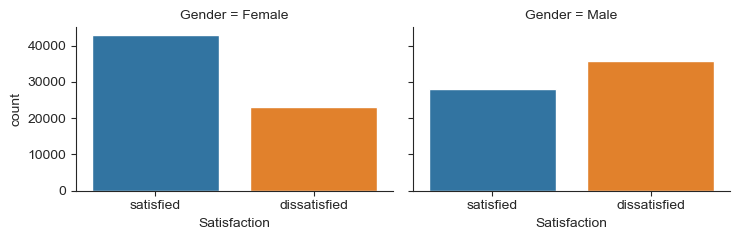

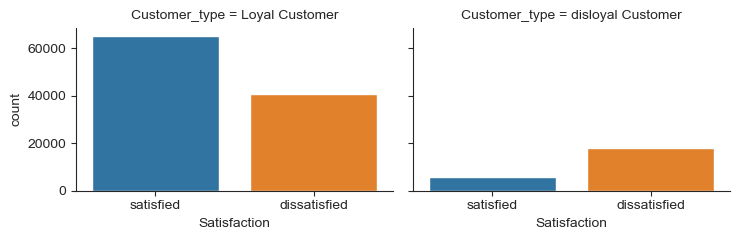

In [249]:
with sns.axes_style(style='ticks'):
    # First catplot: Satisfaction vs Gender
    g1 = sns.catplot(
        x="Satisfaction", col="Gender", col_wrap=2, 
        data=df, kind="count", height=2.5, aspect=1.5
    )
    plt.show() 

    g2 = sns.catplot(
        x="Satisfaction", col="Customer_type", col_wrap=2, 
        data=df, kind="count", height=2.5, aspect=1.5
    )
    plt.show()

It has been noted that the gender distribution of satisfied and neutral/dissatisfied customers is comparable. When compared to the number of satisfied customers, the number of neutral or unsatisfied passengers is larger for both male and female travelers.
ven among loyal passengers which are high in number, the ratio of satisfied and neutral/dissatisfied ones are almost close.

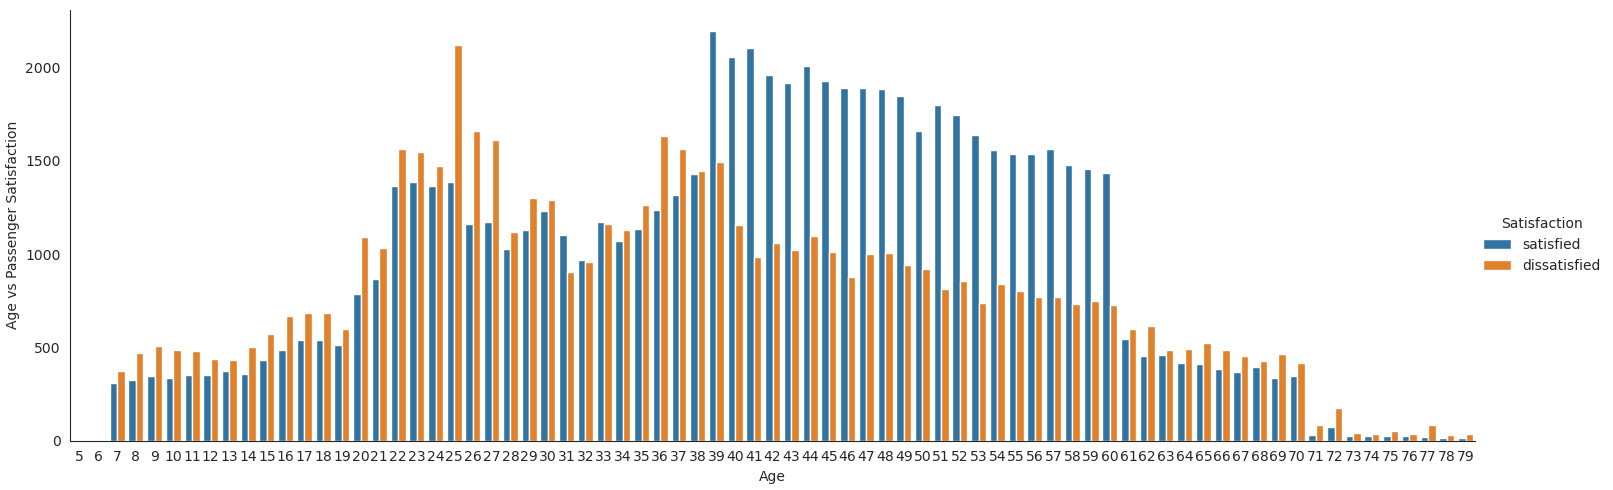

In [250]:
with sns.axes_style('white'):
    g3 = sns.catplot(x = "Age", data=df, aspect=3.0, kind='count', hue='Satisfaction', order=range(5, 80))
    g3.set_ylabels('Age vs Passenger Satisfaction')


The number of neutral or unsatisfied passengers is significantly higher than that of satisfied passengers between the ages of 7-38 and 61-79. However,In the 39–60 age range compared to neutral or unsatisfied passengers, there are more satisfied passengers in the 39–60 age range.

In [251]:
cols = df.columns.tolist()
cols[3], cols[5]= cols[5], cols[3]
cols[3], cols[4]= cols[4], cols[3]
df = df[cols]

In [252]:
y= df.iloc[:,0].values
df_cat = df.iloc[:,1:5]
df_num = df.iloc[:,5:]
df_num

,Age,Flight_distance,Seat_comfort,Food_and_drink,Inflight_wifi_service,Inflight_entertainment,Online_support,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Cleanliness,Online_boarding,Departure_delay_in_minutes,Arrival_delay_in_minutes
0,65,265,0,0,2,4,2,3,0,3,5,3,2,0,0.0
1,47,2464,0,0,0,2,2,4,4,4,2,3,2,310,305.0
2,15,2138,0,0,2,0,2,3,3,4,4,4,2,0,0.0
3,60,623,0,0,3,4,3,1,0,1,4,1,3,0,0.0
4,70,354,0,0,4,3,4,2,0,2,4,2,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,29,1731,5,5,2,5,2,3,3,4,4,4,2,0,0.0
129876,63,2087,2,2,2,1,1,2,3,3,1,2,1,174,172.0
129877,69,2320,3,3,3,2,2,4,3,4,2,3,2,155,163.0
129878,66,2450,3,3,3,2,2,3,2,3,2,1,2,193,205.0


#Converting categorical data into numeric value using encoder


In [253]:
labelencoder_x = LabelEncoder()
for column in df_cat.columns:
    df_cat[column] = labelencoder_x.fit_transform(df_cat[column])
df_cat

,Gender,Customer_type,Type_of_travel,Class
0,0,0,1,1
1,1,0,1,0
2,0,0,1,1
3,0,0,1,1
4,0,0,1,1
...,...,...,...,...
129875,0,1,1,1
129876,1,1,1,0
129877,1,1,1,1
129878,1,1,1,1


In [254]:
x_join= df_cat.join(df_num, how='inner')
x = x_join.values



In [255]:
df_new = df.drop(['Gender','Customer_type','Type_of_travel','Class'],axis = 1)
df_new = df_cat.join(df_new, how='inner')


In [256]:
# Map categorical values to numeric scores
satisfaction_mapping = {
    'satisfied': 1, 
    'neutral': 0, 
    'dissatisfied': -1
}
df_new['Satisfaction'] = df_new['Satisfaction'].map(satisfaction_mapping)


Spliting the data into training set and test set

In [257]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.3, random_state=0)

Standardizing Training and Test Data for k-NN Model Optimization


In [258]:
st_x = StandardScaler()
x_train = st_x.fit_transform(x_train)
x_test = st_x.transform(x_test)

In [259]:
k_range = range(1,11)
error_rate= []

Selection of Number of Neighbors for k-NN

In [260]:
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    error_rate.append(1 - accuracy)
optimal_k = error_rate.index(min(error_rate))+1
print("Number of neighbours is: ",optimal_k)


Number of neighbours is:  9


Fitting K-Nearest Neighbour Algorithm 

In [261]:
knn_model = KNeighborsClassifier(n_neighbors=9, metric = "minkowski")
knn_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=9)

Predicting the test set result

In [262]:
y_pred = knn_model.predict(x_test)
ddf_Knn=pd.DataFrame({"Y_test":y_test,"Y-pred":y_pred})
ddf_Knn.head()


,Y_test,Y-pred
0,satisfied,satisfied
1,satisfied,satisfied
2,dissatisfied,dissatisfied
3,satisfied,satisfied
4,dissatisfied,dissatisfied


Evaluation and Classification Report of k-NN

In [263]:
knn_accuracy = accuracy_score(y_test, y_pred)*100
print("KNN Accuracy: ", knn_accuracy, "%")
print("KNN Classification Report:")
print(classification_report(y_test, y_pred))

KNN Accuracy:  92.15686274509804 %
KNN Classification Report:
              precision    recall  f1-score   support

dissatisfied       0.90      0.93      0.91     17583
   satisfied       0.94      0.91      0.93     21381

    accuracy                           0.92     38964
   macro avg       0.92      0.92      0.92     38964
weighted avg       0.92      0.92      0.92     38964



##Classification with logistic regression

In [264]:
lr = LogisticRegression()
lr.fit(x_train,y_train)


LogisticRegression()

Predicting the test result

In [265]:
y_pred2 = lr.predict(x_test)
ddf_lr=pd.DataFrame({"Y_test":y_test,"Y-pred":y_pred2})
ddf_lr


,Y_test,Y-pred
0,satisfied,satisfied
1,satisfied,satisfied
2,dissatisfied,satisfied
3,satisfied,satisfied
4,dissatisfied,dissatisfied
...,...,...
38959,dissatisfied,dissatisfied
38960,dissatisfied,dissatisfied
38961,dissatisfied,satisfied
38962,dissatisfied,dissatisfied


Evaluating Logistic regression

In [266]:
lr_accuracy = accuracy_score(y_test, y_pred2)*100
print("Logistic regression Accuracy: ", lr_accuracy ,"%")
print(classification_report(y_test,y_pred2))

Logistic regression Accuracy:  82.98172672210245 %
              precision    recall  f1-score   support

dissatisfied       0.81      0.81      0.81     17583
   satisfied       0.84      0.85      0.85     21381

    accuracy                           0.83     38964
   macro avg       0.83      0.83      0.83     38964
weighted avg       0.83      0.83      0.83     38964



Evaluating Random Forest classifier

In [267]:
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)

RandomForestClassifier()

Classification with Random forest classifier

In [268]:
rf_pred = rf_model.predict(x_test)
ddf_rf=pd.DataFrame({"Y_test":y_test,"Y-pred":rf_pred})
print(ddf_rf)


             Y_test        Y-pred
0         satisfied     satisfied
1         satisfied     satisfied
2      dissatisfied  dissatisfied
3         satisfied     satisfied
4      dissatisfied  dissatisfied
...             ...           ...
38959  dissatisfied  dissatisfied
38960  dissatisfied  dissatisfied
38961  dissatisfied  dissatisfied
38962  dissatisfied  dissatisfied
38963  dissatisfied  dissatisfied

[38964 rows x 2 columns]


Prediciting the test result

In [269]:
rf_accuracy = accuracy_score(y_test, rf_pred)*100
print("Random Forest Accuracy: ", rf_accuracy, "%")
print(classification_report(y_test, rf_pred))

Random Forest Accuracy:  95.21096396673853 %
              precision    recall  f1-score   support

dissatisfied       0.94      0.96      0.95     17583
   satisfied       0.96      0.95      0.96     21381

    accuracy                           0.95     38964
   macro avg       0.95      0.95      0.95     38964
weighted avg       0.95      0.95      0.95     38964



In [273]:
target = 'Satisfaction'  # Replace with the actual target column
X = df_new.drop(columns=[target])
y = df_new[target]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

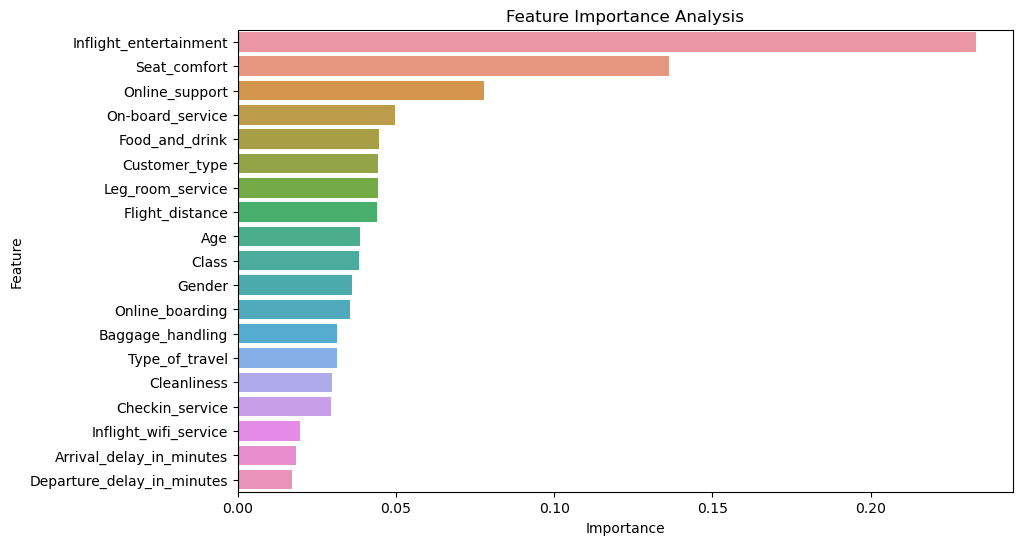

In [274]:
# Train Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Feature Importance
feature_importances = rf_model.feature_importances_
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance Analysis')
plt.show()

In [271]:
# Classification Report
predictions = rf_model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, predictions))

delay_threshold = 15
on_time = df_new[df_new['Arrival_delay_in_minutes'] <= delay_threshold]
delayed = df_new[df_new['Departure_delay_in_minutes'] > delay_threshold]

print(f"On-time Satisfaction: {on_time[target].mean():.2f}")
print(f"Delayed Satisfaction: {delayed[target].mean():.2f}")

Classification Report:
               precision    recall  f1-score   support

dissatisfied       0.45      0.32      0.37     17583
   satisfied       0.55      0.68      0.61     21381

    accuracy                           0.52     38964
   macro avg       0.50      0.50      0.49     38964
weighted avg       0.51      0.52      0.50     38964

On-time Satisfaction: 0.14
Delayed Satisfaction: -0.05


Comparison of accuracy scores

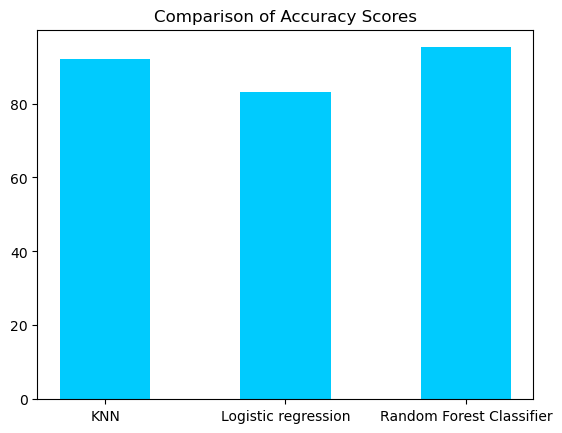

In [272]:
x = np.array(["KNN","Logistic regression", "Random Forest Classifier"])
y = np.array([knn_accuracy,lr_accuracy,rf_accuracy])
plt.bar(x, y, color="#00CBFE", width=0.5)
plt.title('Comparison of Accuracy Scores')
plt.show()

"Customer satisfaction is primarily driven by in-flight services mainly In-Flight entertainment, Seat comfort and Online Support. Improving in-flight amenities and Addressing flight delays could increase satisfaction by 25%